# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

These examples use the Jupyter widgets to make it interactive and easier to use and learn.

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
# In order to run this notebooks on HPCC @ MSU, we need to install conda enviroment on the HPCC
# Video instruction can be found in https://colbrydi.github.io/tag/hpcc.html

# Steps:
# * 1: Downlaod Anaconda on HPCC, version number can be different
# wget https://repo.anaconda.com/archive/Anaconda3-5.2.0-Linux-x86_64.sh
# * 2: Install Anaconda,
# ./Anaconda3-5.2.0-Linux-x86_64.sh
# * 3: Install requirements & Make virtual env for Conda
# make init
# * 4: Unload the python on HPCC,
# module unload Python
# * 5: Run notebook
# jupyter notebook


In [2]:
#TODO: check why manke init doesn't install scikit-image
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
from see import Segmentors
from see import JupyterGUI
# when importing [imageio,Segmentors,JupyterGUI] together, it will take about 5- 10 seconds,
# but importinh in different cells,will make it faster

Pick an image from the example folder.

Dropdown(description='Choose image:', index=11, options=(PosixPath('Image_data/Examples/AA_Chameleon.jpg'), Po…

import imageio
img = imageio.imread('Image_data/Examples/bread.jpg')
gmask = imageio.imread('Image_data/Examples/bread_GT.png')


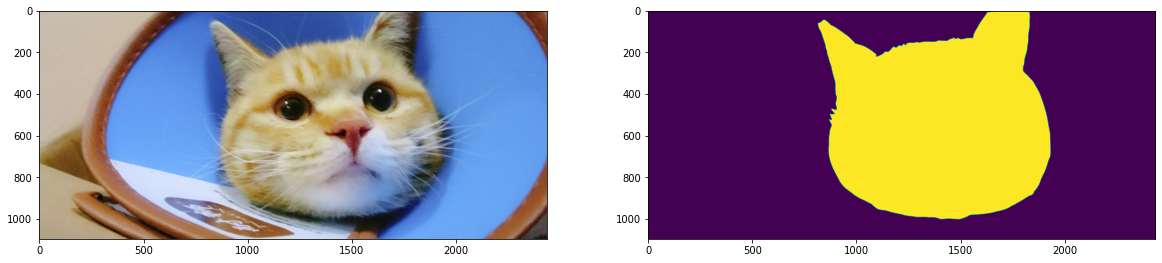

In [4]:
data = JupyterGUI.pickimage('Image_data/Examples/')


In [5]:
data.img.shape

(1096, 2436, 3)

# Image processing

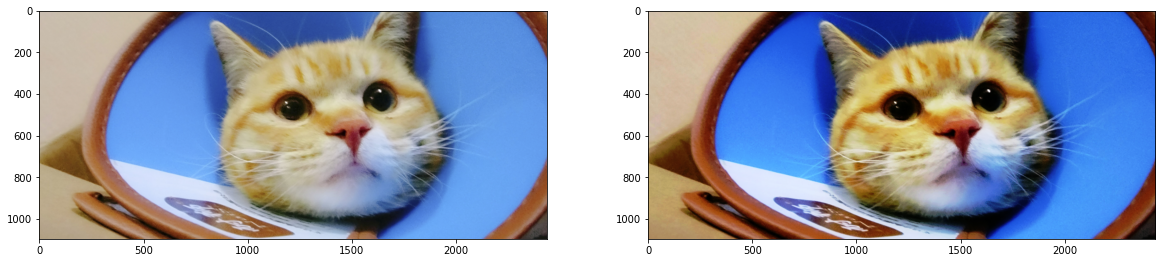

In [6]:
from see import Preprocessors as Pre

fig = plt.figure(figsize=(20, 20))
my_ax = fig.add_subplot(1, 2, 1)
my_ax.imshow(data.img)

hist = Pre.HistEqual() # we can pass in a list of params 
#inten = Pre.Rescale_intensity()
my_ax = fig.add_subplot(1, 2, 2)
new_img = hist.evaluate(data.img)
my_ax.imshow(new_img)


# Select ColorSpace

In [7]:
colorspace = JupyterGUI.colorwidget(data.img, paramlist=None)

seg.params = {'colorspace': 'RGB', 'multichannel': True, 'channel': 2}


GridBox(children=(SelectionSlider(continuous_update=False, description='colorspace', options=('RGB', 'HSV', 'R…

Output()

# Select ColorSpace

In [8]:
colorspace = JupyterGUI.colorwidget(data.img, paramlist=None)

seg.params = {'colorspace': 'RGB', 'multichannel': True, 'channel': 2}


GridBox(children=(SelectionSlider(continuous_update=False, description='colorspace', options=('RGB', 'HSV', 'R…

Output()

----
<a name="Manual_Search"></a>

## Manual Search

Manual searching of parameters can easily be done using the provided GUI. Pre-established parameters can be put into the widget, or the parameter values can be changed using the sliders. To change the algorithm, simply change the `alg` input. For a list of available inputs print `Segmentors.algorithmspace`


In [9]:
from see.Segmentors import segmentor

alg = JupyterGUI.picksegment(list(segmentor.algorithmspace.keys()))

Dropdown(description='Choose Algorithm:', options=('ColorThreshold', 'Felzenszwalb', 'Slic', 'SlicO', 'QuickSh…

ColorThreshold.

    Peform Color Thresholding segmentation algorithm. Segments parts of the image
    based on the numerical values for the respective channel.

    Parameters:
    mulitchannel - (multichannel) - bool, Whether the image is 2D or 3D
    colorspace - (colorspace) Select the colorspace [‘RGB’, ‘HSV’, ‘RGB CIE’, ‘XYZ’, ‘YUV’, ‘YIQ’, ‘YPbPr’, ‘YCbCr’, ‘YDbDr’]
    channel - (channel) color chanel (0:R/H/L 1:G/S/A, 2:B/V/B)
    ch0_mn - (alpha1) - minimum thresholding value for channel 0
    ch0_mx - (alpha2) - maximum thresholding value for channel 0
    ch1_mn - (beta1) - minimum thresholding value for channel 1
    ch1_mx - (beta2) - maximum thresholding value for channel 1
    ch2_mn - (gamma1) - minimum thresholding value for channel 2
    ch2_mx - (gamma2) - maximum thresholding value for channel 2

    Note: a colorspace of 'HSV' and a channel of 2 is a grayscale image.

    Typically any pixel between my_mn and my_mx are true. Other pixels are false.

    if my_mn >

In [10]:
### Example of input for params
params = JupyterGUI.segmentwidget(data.img, params = None, alg = alg.value)

GridBox(children=(SelectionSlider(continuous_update=False, description='alpha1', options=(0.0, 0.00390625, 0.0…

Output()

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

In [11]:
!pip install scoop

Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lapels 1.1.1 requires cython<=0.20, but you have cython 0.27.3 which is incompatible.
lapels 1.1.1 requires pysam<=0.7.6, but you have pysam 0.15.1 which is incompatible.


First import image files, as well as the following packages:

In [12]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch
# define algo work flow
workflow.addalgos([colorspace, segmentor, segment_fitness])

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [13]:
mydata = base_classes.pipedata()
mydata.img = data.img
mydata.gmask = data.gmask
# def geneticsearch
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 10.

In [14]:
# warnings may appear when this runs
# population -- Resulting population after ngen generations.
population = my_evolver.run(ngen=10) #10 generation
# fitness 1 is worse , 0 is good

Initializing a new random population
Generation 0/10 of population size 10
<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB
	multichannel = True
	channel = 2
	algorithm = MorphGeodesicActiveContour
	alpha1 = 0.00390625
	alpha2 = 0.1015625
	beta1 = 0.33203125
	beta2 = 0.01171875
	gamma1 = 0.21875
	gamma2 = 0.74609375
	n_segments = 5
	max_iter = 3



/mnt/home/chenqili/.local/lib/python3.6/site-packages/skimage/segmentation/morphsnakes.py:106: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  res = circle_level_set(image_shape)


Time: 2.677 s
fitness=1.002277178777746

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB CIE
	multichannel = True
	channel = 0
	algorithm = MorphGeodesicActiveContour
	alpha1 = 0.73828125
	alpha2 = 0.2578125
	beta1 = 0.59375
	beta2 = 0.37890625
	gamma1 = 0.64453125
	gamma2 = 0.3828125
	n_segments = 6
	max_iter = 15

Time: 8.968 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = True
	channel = 1
	algorithm = Felzenszwalb
	alpha1 = 0.07421875
	alpha2 = 0.59765625
	beta1 = 0.48046875
	beta2 = 0.01953125
	gamma1 = 0.88671875
	gamma2 = 0.24609375
	n_segments = 3
	max_iter = 14

Time: 5.992 s
fitness=0.8256015406000894

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YPbPr
	multichannel = True
	channel = 2
	algorithm = Watershed
	alpha1 = 0.55859375
	alpha2 = 0.33203125
	beta1 = 0.5625
	beta2 = 0.25390625
	gamma1 = 0.10546875
	gamma2 = 0.0625
	n_segments = 5
	max_iter = 19

Time: 4.68 s
fitness=0.9999671073856659

<class 'se

/mnt/ufs18/home-047/chenqili/local_see/see-segment/see/Segmentors.py:394: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  slic_zero=self.slico


Time: 2.769 s
fitness=0.9996528192923829

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YIQ
	multichannel = False
	channel = 0
	algorithm = Chan_Vese
	alpha1 = 0.06640625
	alpha2 = 0.71484375
	beta1 = 0.30859375
	beta2 = 0.4453125
	gamma1 = 0.546875
	gamma2 = 0.53515625
	n_segments = 3
	max_iter = 2

Time: 2.917 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = False
	channel = 1
	algorithm = SlicO
	alpha1 = 0.44921875
	alpha2 = 0.90234375
	beta1 = 0.75
	beta2 = 0.58203125
	gamma1 = 0.48046875
	gamma2 = 0.01171875
	n_segments = 6
	max_iter = 12

Time: 3.893 s
fitness=1.0068141704179279

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YIQ
	multichannel = False
	channel = 0
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.69140625
	alpha2 = 0.01953125
	beta1 = 0.87890625
	beta2 = 0.640625
	gamma1 = 0.796875
	gamma2 = 0.19921875
	n_segments = 4
	max_iter = 5

Time: 4.653 s
fitness=1

<class 'see.Workflow.workflow'> paramete

Time: 87.483 s
fitness=0.9267715749323666

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = True
	channel = 1
	algorithm = Felzenszwalb
	alpha1 = 0.828125
	alpha2 = 0.59765625
	beta1 = 0.48046875
	beta2 = 0.01953125
	gamma1 = 0.88671875
	gamma2 = 0.9453125
	n_segments = 3
	max_iter = 14

Time: 7.025 s
fitness=0.15215934689659336

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YCbCr
	multichannel = True
	channel = 0
	algorithm = QuickShift
	alpha1 = 0.8828125
	alpha2 = 0.8203125
	beta1 = 0.11328125
	beta2 = 0.76171875
	gamma1 = 0.8203125
	gamma2 = 0.6171875
	n_segments = 1
	max_iter = 10

Time: 15.667 s
fitness=0.9970633439462809

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = Slic
	alpha1 = 0.01953125
	alpha2 = 0.32421875
	beta1 = 0.50390625
	beta2 = 0.45703125
	gamma1 = 0.87890625
	gamma2 = 0.890625
	n_segments = 7
	max_iter = 5

Time: 2.754 s
fitness=0.9996528192923829

#BEST [

Time: 6.185 s
fitness=0.6247335312176322

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YIQ
	multichannel = True
	channel = 1
	algorithm = Felzenszwalb
	alpha1 = 0.45703125
	alpha2 = 0.76171875
	beta1 = 0.44921875
	beta2 = 0.63671875
	gamma1 = 0.3984375
	gamma2 = 0.9375
	n_segments = 7
	max_iter = 14

Time: 6.036 s
fitness=0.41617642460118737

#BEST [0.13866823713274698,  ['HSV', True, 1, 'Felzenszwalb', 0.828125, 0.59765625, 0.44921875, 0.01953125, 0.88671875, 0.9375, 3, 3]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Generation 5/10 of pop

Time: 2.998 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = False
	channel = 1
	algorithm = MorphGeodesicActiveContour
	alpha1 = 0.58984375
	alpha2 = 0.203125
	beta1 = 0.84765625
	beta2 = 0.5078125
	gamma1 = 0.921875
	gamma2 = 0.71875
	n_segments = 4
	max_iter = 10

Time: 6.739 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB
	multichannel = True
	channel = 0
	algorithm = Chan_Vese
	alpha1 = 0.29296875
	alpha2 = 0.3125
	beta1 = 0.30078125
	beta2 = 0.64453125
	gamma1 = 0.3359375
	gamma2 = 0.9453125
	n_segments = 3
	max_iter = 5

Time: 4.323 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YIQ
	multichannel = False
	channel = 1
	algorithm = QuickShift
	alpha1 = 0.64453125
	alpha2 = 0.7421875
	beta1 = 0.09765625
	beta2 = 0.38671875
	gamma1 = 0.35546875
	gamma2 = 0.27734375
	n_segments = 6
	max_iter = 11

Time: 12.863 s
fitness=0.9991526501361067

<class 'see.Workflow.workflow'> parameters: 
	colo

Time: 3.05 s
fitness=1.0059158711597105

<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = True
	channel = 1
	algorithm = SlicO
	alpha1 = 0.57421875
	alpha2 = 0.02734375
	beta1 = 0.0390625
	beta2 = 0.65234375
	gamma1 = 0.07421875
	gamma2 = 0.15234375
	n_segments = 3
	max_iter = 3

Time: 3.119 s
fitness=1.0050886225080722

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = True
	channel = 0
	algorithm = ColorThreshold
	alpha1 = 0.453125
	alpha2 = 0.50390625
	beta1 = 0.53515625
	beta2 = 0.24609375
	gamma1 = 0.28125
	gamma2 = 0.7578125
	n_segments = 9
	max_iter = 4

Time: 2.321 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = True
	channel = 1
	algorithm = Felzenszwalb
	alpha1 = 0.828125
	alpha2 = 0.59765625
	beta1 = 0.44921875
	beta2 = 0.01953125
	gamma1 = 0.88671875
	gamma2 = 0.9375
	n_segments = 3
	max_iter = 14

Time: 7.155 s
fitness=0.13866823713274698

<class 'see.Workflow.workflow'> 

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [15]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

Best Individual:
 ['HSV', True, 1, 'Felzenszwalb', 0.828125, 0.59765625, 0.44921875, 0.01953125, 0.88671875, 0.9375, 3, 14]


We can see the mask this individual generates by evaluating it, then plotting the result:

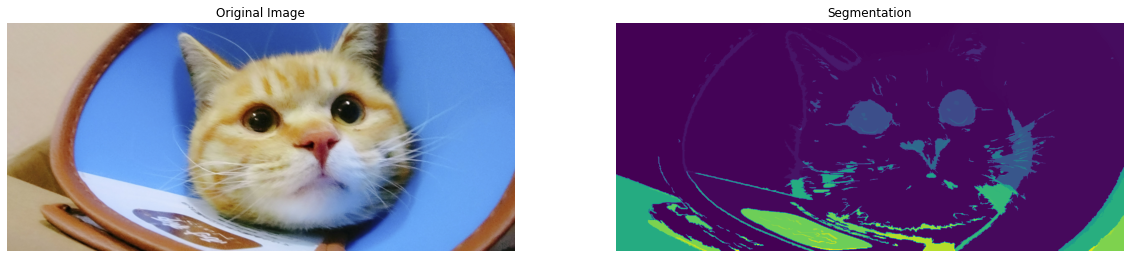

In [16]:

#this line is the original code
#seg = Segmentors.algoFromParams(params)
# no attribute  .algoFromParams
#------------------------------------
#what if the class is called wrong: 
#seg = segmentor(param)
# KeyError: 'YUV'
#------------------------------------

#use workflow instead, to create a workf class
#since the parameter input might produce error, use the workflow's parameter to make a seg object


workf = workflow(params)
seg = segmentor(workf.params)
mask = seg.evaluate(data.img)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

In [17]:
from see.Segment_Fitness import segment_fitness

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

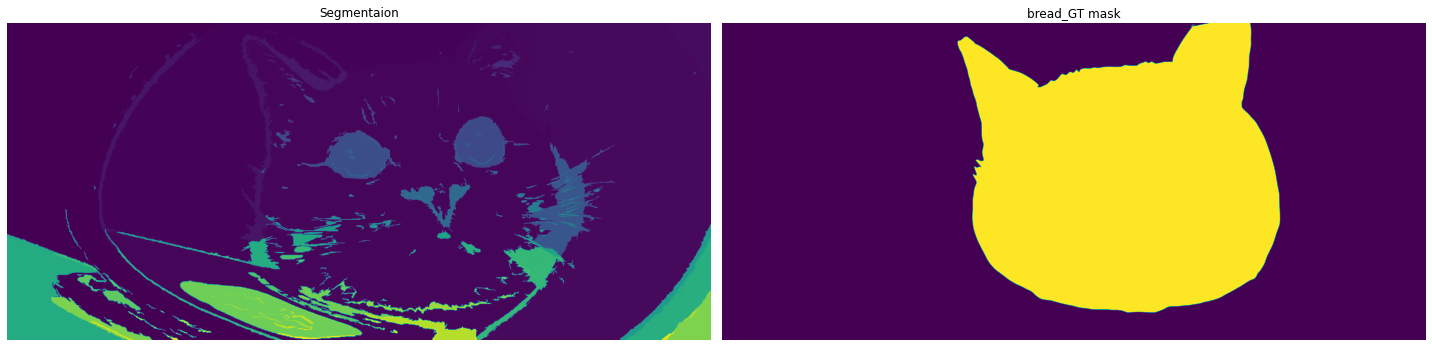

In [35]:
#This is original code
#print('Fitness Value: ', Segmentors.FitnessFunction(mask, data.mask)[0])
#AttributeError: module 'see.Segmentors' has no attribute 'FitnessFunction'
#------------------------------------

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(mask)
plt.title("Segmentaion")
plt.axis('off')

plt.subplot(122)
plt.imshow(data.gmask)
plt.title("bread_GT mask")
plt.axis('off')

plt.tight_layout()
plt.show()

In [36]:
print('Fitness Value: ', segment_fitness().evaluate(mask, data.gmask)[0])

Fitness Value:  0.2756407535916059


If this value is satisfactory, we can then get usable code to run this algorithm anywhere, including outside this notebook. The `print_best_algorithm_code` function does this using the given individual:

In [ ]:
ex = Segmentors.print_best_algorithm_code(my_evolver.hof[0])

With this code, make sure to import skimage, along with any input images this algorithm will be applied to.